## TP Matematica Superior K3052 - Santiago Ozan

Este trabajo practico esta desarrollado en python usando librerias de pandas y matplotlib

https://github.com/santi12386/TP_Mat_Sup

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
datos_matrix = np.matrix('0.2 0.6 1.2 1.9 2.8 3.5 3.7 4.3 4.9 5.7 6.1 6.5; 2.36 2.55 2.89 3.34 3.98 4.87 5.65 6.83 7.92 9.44 11.04 12.89')
datos_matrix

datos = pd.DataFrame(datos_matrix)
    

In [37]:
aux = pd.DataFrame(np.asarray(datos).transpose())
datos_dataframe = aux.rename(columns={0: "X", 1: "Y"})
datos_dataframe

,X,Y
0,0.2,2.36
1,0.6,2.55
2,1.2,2.89
3,1.9,3.34
4,2.8,3.98
5,3.5,4.87
6,3.7,5.65
7,4.3,6.83
8,4.9,7.92
9,5.7,9.44


# Punto a)
Grafico de la nube de puntos

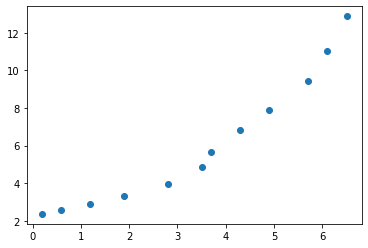

In [38]:
plt.plot(datos_dataframe['X'], datos_dataframe['Y'], 'o')

# Punto b)

Recta de minimos cuadrados:

Expresion aproximante:
$$P(x)=A_1*x+A_2$$

Sistema de ecuaciones normales:
$$A_1\sum_{n=0}^{11}{x_i}^2+A_2\sum_{n=0}^{11}{x_i} =\sum_{n=0}^{11}{f({x_i}){x_i}}$$

$$A_1\sum_{n=0}^{11}{x_i}+A_2*n=\sum_{n=0}^{11}{f({x_i})}$$

In [39]:
xi_2 = pow(datos_dataframe['X'], 2)
xi_yi = datos_dataframe['X']*datos_dataframe['Y']

tabla1 = pd.concat([datos_dataframe['X'], datos_dataframe['Y'], xi_2, xi_yi], axis=1)
tabla1.columns = ['Xi', 'Yi', 'Xi^2', 'Xi Yi']

tabla1_sums = pd.DataFrame([sum(tabla1['Xi']), sum(tabla1['Yi']), sum(tabla1['Xi^2']), sum(tabla1['Xi Yi'])]).transpose()
tabla1_sums.columns=['Xi', 'Yi', 'Xi^2', 'Xi Yi']

display(tabla1, tabla1_sums)

,Xi,Yi,Xi^2,Xi Yi
0,0.2,2.36,0.04,0.472
1,0.6,2.55,0.36,1.530
2,1.2,2.89,1.44,3.468
3,1.9,3.34,3.61,6.346
4,2.8,3.98,7.84,11.144
5,3.5,4.87,12.25,17.045
6,3.7,5.65,13.69,20.905
7,4.3,6.83,18.49,29.369
8,4.9,7.92,24.01,38.808
9,5.7,9.44,32.49,53.808


,Xi,Yi,Xi^2,Xi Yi
0,41.4,73.76,193.68,334.024


Planteo de las ecuaciones normales:

$$A_1*193.68+A_2*41.4=334.024$$
$$A_1*41.4+A_2*12=73.76$$

$$A_1=\frac{334.024-A_2*41.4}{193.68}$$

$$A_2=\frac{73.76-A_1*41.4}{12}$$

Formulas de Jacobi
$$A_1^{k+1}=-A_2^k*(41.4/193.68)+(334.024/193.68)$$

$$A_2^{k+1}=-A_1^k*(41.4/12)+(73.76/12)$$

In [40]:
T_Jacobi = np.matrix([[0, -41.4/193.68],[-41.4/12, 0]])
display("T de Jacobi", pd.DataFrame(T_Jacobi))
C_Jacobi = np.matrix([[334.024/193.68],[73.76/12]])
display("C", pd.DataFrame(C_Jacobi))

A_Jacobi = np.matrix([[0],[0]])
A_Jacobi_anterior = A_Jacobi
display("A Inicial", pd.DataFrame(A_Jacobi))

for i in range(0,100):
    A_Jacobi = T_Jacobi*A_Jacobi_anterior+C_Jacobi
    A_Jacobi_anterior = A_Jacobi
display("A a las 100 iteraciones" ,pd.DataFrame(A_Jacobi))


'T de Jacobi'

,0,1
0,0.00,-0.213755
1,-3.45,0.000000


'C'

,0
0,1.724618
1,6.146667


'A Inicial'

,0
0,0
1,0


'A a las 100 iteraciones'

,0
0,1.564444
1,0.749333


Recta aproximante hallada:
$$P(x)=1.564444*x+0.749333$$

Graficos - Recta de minimos cuadrados hallada por aproximacion + nube de puntos

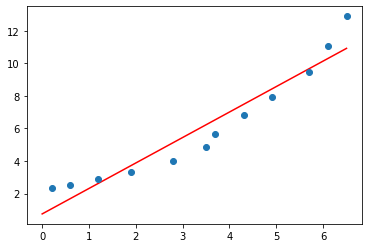

In [41]:
x = np.linspace(0,6.5,100)
y = 1.564444*x+0.749333

plt.plot(x, y, '-r', label='P(x)=1.564444*x+0.749333')
plt.plot(datos_dataframe['X'], datos_dataframe['Y'], 'o')

# Punto c

Parabola de minimos cuadrados

Expresion aproximante:
$$P(x)=A_1*x^2+A_2x+A_3$$

Sistema de ecuaciones normales:
$$A_1\sum_{n=0}^{11}{x_i}^4+A_2\sum_{n=0}^{11}{x_i}^3+A_3\sum_{n=0}^{11}{x_i}^2=\sum_{n=0}^{11}{f({x_i}){x_i}^2}$$
$$A_1\sum_{n=0}^{11}{x_i}^3+A_2\sum_{n=0}^{11}{x_i}^2+A_3\sum_{n=0}^{11}{x_i}=\sum_{n=0}^{11}{f({x_i}){x_i}}$$
$$A_1\sum_{n=0}^{11}{x_i}^2+A_2\sum_{n=0}^{11}{x_i}+A_3*n=\sum_{n=0}^{11}{f({x_i})}$$


In [42]:
xi_2 = pow(datos_dataframe['X'], 2)
xi_3 = pow(datos_dataframe['X'], 3)
xi_4 = pow(datos_dataframe['X'], 4)
xi_yi = datos_dataframe['X']*datos_dataframe['Y']
xi_2_yi = xi_2*datos_dataframe['Y']

tabla2 = pd.concat([datos_dataframe['X'], datos_dataframe['Y'], xi_2, xi_3, xi_4, xi_yi, xi_2_yi], axis=1)
tabla2.columns = ['Xi', 'Yi', 'Xi^2', 'Xi^3', 'Xi^4', 'Xi Yi', 'Xi^2 Yi']
    
tabla2_sums = pd.DataFrame([sum(tabla2['Xi']), sum(tabla2['Yi']), sum(tabla2['Xi^2']), sum(tabla2['Xi^3']), sum(tabla2['Xi^4']), sum(tabla2['Xi Yi']), sum(tabla2['Xi^2 Yi'])]).transpose()
tabla2_sums.columns=['Xi', 'Yi', 'Xi^2', 'Xi^3', 'Xi^4', 'Xi Yi', 'Xi^2 Yi']
display(tabla2, tabla2_sums)

,Xi,Yi,Xi^2,Xi^3,Xi^4,Xi Yi,Xi^2 Yi
0,0.2,2.36,0.04,0.008,0.0016,0.472,0.0944
1,0.6,2.55,0.36,0.216,0.1296,1.530,0.9180
2,1.2,2.89,1.44,1.728,2.0736,3.468,4.1616
3,1.9,3.34,3.61,6.859,13.0321,6.346,12.0574
4,2.8,3.98,7.84,21.952,61.4656,11.144,31.2032
5,3.5,4.87,12.25,42.875,150.0625,17.045,59.6575
6,3.7,5.65,13.69,50.653,187.4161,20.905,77.3485
7,4.3,6.83,18.49,79.507,341.8801,29.369,126.2867
8,4.9,7.92,24.01,117.649,576.4801,38.808,190.1592
9,5.7,9.44,32.49,185.193,1055.6001,53.808,306.7056


,Xi,Yi,Xi^2,Xi^3,Xi^4,Xi Yi,Xi^2 Yi
0,41.4,73.76,193.68,1008.246,5557.788,334.024,1763.993


Planteo del sistema:

$$A_1*5557.788+A_2*1008.246+A_3*193.68=1763.993$$

$$A_1*1008.246+A_2*193.68+A_3*41.4=334.024$$
$$A_1*193.68+A_2*41.4+A_3*12=73.76$$

Ecuaciones de Gauss-Seidel

$$A_1^{K+1}=A_2^k*(-1008.246/5557.788)A_3^k*(-193.68/5557.788)+(1763.993/5557.788)$$

$$A_2^{K+1}=A_1^{K+1}*(-1008.246/193.68)+A_3^k*(-41.4/193.68)+(334.024/193.68)$$

$$A_3^{K+1}=A_1^{K+1}*(-193.68/12)+A_2^{K+1}*(-41.4/12)+(73.76/12)$$

Polinomio aproximante:
$$P(x)=0.255529618189472*x^2-0.143398273502509x+2.51714300600557$$

Graficos - Parabola de minimos cuadrados hallada por aproximacion + nube de puntos

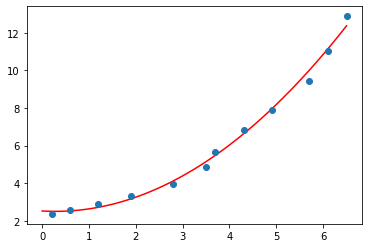

In [43]:
x = np.linspace(0,6.5,100)
y = 0.255529618189472*pow(x,2)-0.143398273502509*x+2.51714300600557

plt.plot(x, y, '-r', label='P(x)=0.255529618189472*x^2-0.143398273502509x+2.51714300600557')

plt.plot(datos_dataframe['X'], datos_dataframe['Y'], 'o')

# Punto d)

Modelo:
$$y =\frac{a}{x+b}$$

Cambio de variables:
$$\frac{1}{y}=\frac{x}{a}+\frac{b}{a}$$
   
$$Y=\frac{1}{y}; A_1=\frac{1}{a}; A_2=\frac{b}{a}$$

Ecuacion lineal propuesta
$$Y=A_1*x+A_2$$

In [44]:
Yi = 1/datos_dataframe['Y']
xi_2 = pow(datos_dataframe['X'], 2)
xi_Yi = datos_dataframe['X']*Yi

tabla1 = pd.concat([datos_dataframe['X'], Yi, xi_2, xi_Yi], axis=1)
tabla1.columns = ['xi', 'Yi', 'xi^2', 'xi Yi']

tabla1_sums = pd.DataFrame([sum(tabla1['xi']), sum(tabla1['Yi']), sum(tabla1['xi^2']), sum(tabla1['xi Yi'])]).transpose()
tabla1_sums.columns=['xi', 'Yi', 'xi^2', 'xi Yi']

display(tabla1, tabla1_sums)

,xi,Yi,xi^2,xi Yi
0,0.2,0.423729,0.04,0.084746
1,0.6,0.392157,0.36,0.235294
2,1.2,0.346021,1.44,0.415225
3,1.9,0.299401,3.61,0.568862
4,2.8,0.251256,7.84,0.703518
5,3.5,0.205339,12.25,0.718686
6,3.7,0.176991,13.69,0.654867
7,4.3,0.146413,18.49,0.629575
8,4.9,0.126263,24.01,0.618687
9,5.7,0.105932,32.49,0.603814


,xi,Yi,xi^2,xi Yi
0,41.4,2.641661,193.68,6.290077


Sistema de ecuaciones normales:
$$A_1\sum_{n=0}^{11}{x_i}^2+A_2\sum_{n=0}^{11}{x_i} =\sum_{n=0}^{11}{f({x_i}){x_i}}$$

$$A_1\sum_{n=0}^{11}{x_i}+A_2*n=\sum_{n=0}^{11}{f({x_i})}$$

Planteo de las ecuaciones normales

$$A_1*193.68+A_2*41.4=6.290077$$
$$A_1*41.4+A_2*12=2.641661$$

$$A_1=\frac{6.290077-A_2*41.4}{193.68}$$
$$A_2=\frac{2.641661-A_1*41.4}{12}$$

Ecuaciones de Jacobi
$$A_1^{k+1}=-A_2^k*(41.4/193.68)+(6.290077/193.68)$$
$$A_2^{k+1}=-A_1^k*(41.4/12)+(2.641661/12)$$

In [45]:
T_Jacobi = np.matrix([[0, -(41.4/193.68)],[-(41.4/12), 0]])
display("T de Jacobi", pd.DataFrame(T_Jacobi))
C_Jacobi = np.matrix([[(6.290077/193.68)],[(2.641661/12)]])
display("C", pd.DataFrame(C_Jacobi))

A_Jacobi = np.matrix([[0],[0]])
A_Jacobi_anterior = A_Jacobi
display("A Inicial", pd.DataFrame(A_Jacobi))

for i in range(0,100):
    A_Jacobi = T_Jacobi*A_Jacobi_anterior+C_Jacobi
    A_Jacobi_anterior = A_Jacobi

display("A a las 100 iteraciones" ,pd.DataFrame(A_Jacobi))

'T de Jacobi'

,0,1
0,0.00,-0.213755
1,-3.45,0.000000


'C'

,0
0,0.032477
1,0.220138


'A Inicial'

,0
0,0
1,0


'A a las 100 iteraciones'

,0
0,-0.055529
1,0.411714


Recordando:
$$Y=\frac{1}{y}; A_1=\frac{1}{a}; A_2=\frac{b}{a}$$

Valores de a y b calculados
$$-0.055529=\frac{1}{a}$$

$$0.411714=\frac{b}{a}$$

$$a=-18.008608; b=-7.414396$$

Funcion aproximante:
$$y=\frac{-18.008608}{x-7.414396}$$

Graficos - aproximacion por modelo + nube de puntos

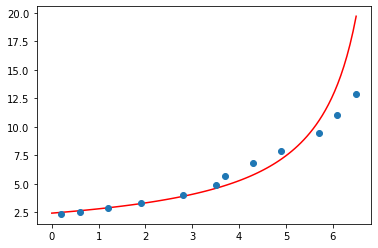

In [46]:
x = np.linspace(0,6.5,100)
y = (-18.008608114678815)/(x-7.41439)
plt.plot(x, y, '-r', label='P(x)=(-18.008608114678815/x)+2.428870')

plt.plot(datos_dataframe['X'], datos_dataframe['Y'], 'o')

# Punto e)

Modelo:\n",
$$y =a*b^x $$

Cambio de variables:
$$\ln{y}=\ln{a}+\ln{b}*x$$

$$Y=\ln{y}; A_1=\ln{b}; A_2=\ln{a}$$

Ecuacion lineal propuesta
$$Y=A_1*x+A_2$$

In [47]:
Yi = np.log(datos_dataframe['Y'])
xi_2 = pow(datos_dataframe['X'], 2)
xi_Yi = datos_dataframe['X']*Yi

tabla1 = pd.concat([datos_dataframe['X'], Yi, xi_2, xi_Yi], axis=1)
tabla1.columns = ['xi', 'Yi', 'xi^2', 'xi Yi']

tabla1_sums = pd.DataFrame([sum(tabla1['xi']), sum(tabla1['Yi']), sum(tabla1['xi^2']), sum(tabla1['xi Yi'])]).transpose()
tabla1_sums.columns=['xi', 'Yi', 'xi^2', 'xi Yi']

display(tabla1, tabla1_sums)

,xi,Yi,xi^2,xi Yi
0,0.2,0.858662,0.04,0.171732
1,0.6,0.936093,0.36,0.561656
2,1.2,1.061257,1.44,1.273508
3,1.9,1.205971,3.61,2.291345
4,2.8,1.381282,7.84,3.867589
5,3.5,1.583094,12.25,5.540829
6,3.7,1.731656,13.69,6.407126
7,4.3,1.921325,18.49,8.261696
8,4.9,2.069391,24.01,10.140017
9,5.7,2.244956,32.49,12.796249


,xi,Yi,xi^2,xi Yi
0,41.4,19.951662,193.68,82.577986


Sistema de ecuaciones normales:
$$A_1\sum_{n=0}^{11}{x_i}^2+A_2\sum_{n=0}^{11}{x_i} =\sum_{n=0}^{11}{f({x_i}){x_i}}$$

$$A_1\sum_{n=0}^{11}{x_i}+A_2*n=\sum_{n=0}^{11}{f({x_i})}$$

Planteo de ecuaciones normales
$$A_1*193.68+A_2*41.4=82.577986$$
$$A_1*41.4+A_2*12=19.951662$$

$$A_1=\frac{82.577986-A_2*41.4}{193.68}$$
$$A_2=\frac{19.951662-A_1*41.4}{12}$$

Ecuaciones de Jacobi\n",
$$A_1^{k+1}=-A_2^k*(41.4/193.68)+(82.577986/193.68)$$
$$A_2^{k+1}=-A_1^k*(41.4/12)+(19.951662/12)$$

In [48]:
T_Jacobi = np.matrix([[0, -(41.4/193.68)],[-(41.4/12), 0]])
display("T de Jacobi", pd.DataFrame(T_Jacobi))
C_Jacobi = np.matrix([[(82.577986/193.68)],[(19.951662/12)]])
display("C", pd.DataFrame(C_Jacobi))

A_Jacobi = np.matrix([[0],[0]])
A_Jacobi_anterior = A_Jacobi
display("A Inicial", pd.DataFrame(A_Jacobi))

for i in range(0,100):
    A_Jacobi = T_Jacobi*A_Jacobi_anterior+C_Jacobi
    A_Jacobi_anterior = A_Jacobi

display("A a las 100 iteraciones" ,pd.DataFrame(A_Jacobi))

'T de Jacobi'

,0,1
0,0.00,-0.213755
1,-3.45,0.000000


'C'

,0
0,0.426363
1,1.662638


'A Inicial'

,0
0,0
1,0


'A a las 100 iteraciones'

,0
0,0.270300
1,0.730104


Cambio de variables:

$$A_1=0.270300=\ln{b}; A_2=0.730104=\ln{a}$$

$$a=e^{0.730104}=2.075296; b=e^{0.270300}=1.310357$$

Funcion aproximante:
$$y=2.075296*1.310357^x$$

Graficos - aproximacion por modelo + nube de puntos

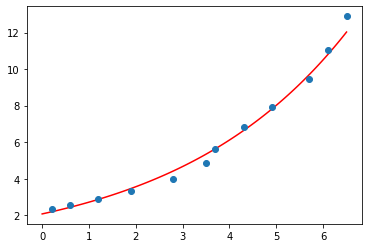

In [49]:
x = np.linspace(0,6.5,100)
y = 2.075296*(pow(1.310357,x))
plt.plot(x, y, '-r', label='P(x)=(-18.008608114678815/x)+2.428870')

plt.plot(datos_dataframe['X'], datos_dataframe['Y'], 'o')

# Punto f)

Por descarte podemos decir que la funcion del punto d) no es adecuada ya que presenta una asintota horizontal en x~=7.41439, luego se mantiene cercana a 0

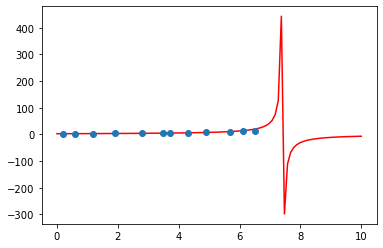

In [50]:
x = np.linspace(0,10,100)
y = (-18.008608114678815)/(x-7.41439)
plt.plot(x, y, '-r', label='P(x)=(-18.008608114678815/x)+2.428870')

plt.plot(datos_dataframe['X'], datos_dataframe['Y'], 'o')

Tambien podemos descartar la recta de minimos cuadrados, ya que tenemos la parabola disponible y esta presenta un error menor

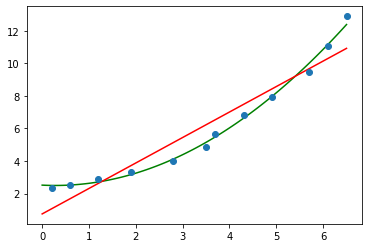

In [51]:
x = np.linspace(0,6.5,100)

y = 0.255529618189472*pow(x,2)-0.143398273502509*x+2.51714300600557

plt.plot(x, y, '-g')

x = np.linspace(0,6.5,100)

y = 1.564444*x+0.749333

plt.plot(x, y, '-r', label='P(x)=1.564444*x+0.749333')

plt.plot(datos_dataframe['X'], datos_dataframe['Y'], 'o')

Esto nos deja con la parabola de minimos cuadrados y el modelo exponencial.

Al graficar ambos en un rango mas amplio, vemos que la exponencial crece mucho mas rapido que la parabola. Al alejarse del rango dado, vemos que la exponencial alcanza niveles absurdos (> 10^100 para 1 millon de subscriptores) mientras que la parabola se mantiene en amplitudes razonables.

Ademas, el modelo exponencial fue calculado "linealmente" a traves de un cambio de variable, por lo que termina siendo inferior al modelo de parabola.

Por lo tanto, el modelo que mejor se adapta en este caso es el de parabolas de minimos cuadrados.

en el caso de los 20k subscriptores, ya no podemos basarnos en lo arrojado por la estimacion ya que se sale demasiado del rango original (200; 6500)

'exponencial: 3000 subscriptores -> 46692 visitas'

'exponencial: 7000 subscriptores -> 137659 visitas'

'exponencial: 20000 subscriptores -> 4622455 visitas'

'parabola: 3000 subscriptores -> 43867 visitas'

'parabola: 7000 subscriptores -> 140343 visitas'

'parabola: 20000 subscriptores -> 1018610 visitas'

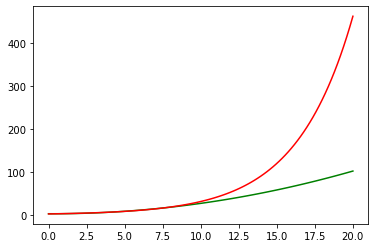

In [52]:
x = np.linspace(0,20, 100)

y = 0.255529618189472*pow(x,2)-0.143398273502509*x+2.51714300600557
display ("exponencial: 3000 subscriptores -> %d visitas" %(10000*(2.075296*(pow(1.310357,3)))))
display ("exponencial: 7000 subscriptores -> %d visitas" %(10000*(2.075296*(pow(1.310357,7)))))
display ("exponencial: 20000 subscriptores -> %d visitas" %(10000*(2.075296*(pow(1.310357,20)))))
display ("parabola: 3000 subscriptores -> %d visitas" %(10000*(0.255529618189472*pow(3,2)-0.143398273502509*3+2.51714300600557)))
display ("parabola: 7000 subscriptores -> %d visitas" %(10000*(0.255529618189472*pow(7,2)-0.143398273502509*7+2.51714300600557)))
display ("parabola: 20000 subscriptores -> %d visitas" %(10000*(0.255529618189472*pow(20,2)-0.143398273502509*20+2.51714300600557)))
plt.plot(x, y, '-g',label='P(x)=0.255529618189472*x^2-0.143398273502509x+2.51714300600557')
         
y = 2.075296*(pow(1.310357,x))
plt.plot(x, y, '-r', label='P(x)=(-18.008608114678815/x)+2.428870')